## **Import the Libraries**

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score,auc


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **Import the Diabetes dataframe**

In [11]:
df=pd.read_csv("./Datasets/diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [28]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1500, 8)
Test set size: (500, 8)


In [29]:
y.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [30]:
y_train.value_counts()

Outcome
0    987
1    513
Name: count, dtype: int64

In [27]:
# WIthout Stratify
979/(979+521)

0.6526666666666666

In [31]:
#With stratify
987/(987+531)

0.650197628458498

## Model Training

In [ ]:
model=LogisticRegression()9\

model.fit(X_train,y_train)

LogisticRegression()

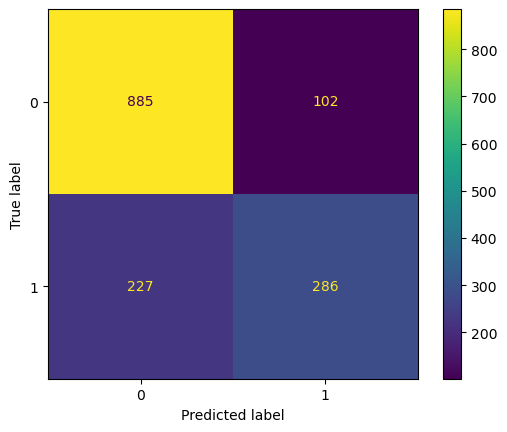

In [36]:
y_pred_train=model.predict(X_train)
 #compute confusion matrix
cm=confusion_matrix(y_train,y_pred_train)


#Display the confusion matrix

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

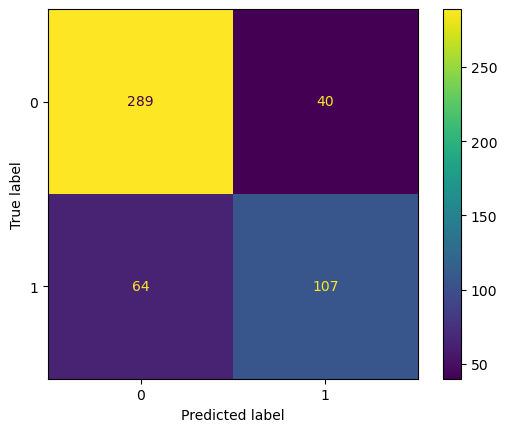

In [37]:
y_pred_test=model.predict(X_test)

#compute confusion matrix

cm=confusion_matrix(y_test,y_pred_test)


#Display the confusion matrix

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [38]:
# Training accuracy
model.score(X_train,y_train)

0.7806666666666666

In [39]:
# Testing accuracy
model.score(X_test,y_test)

0.792

In [41]:
# Model test

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model has a good fit.")

Training Accuracy: 0.7806666666666666
Testing Accuracy: 0.792
The model is underfitting.


In [42]:
y_pred=model.predict(X_test)
# Testing data
cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cnf_matrix)

print("*"*45)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy_score",accuracy)
print("*"*45)

clf_report=classification_report(y_train,y_pred_train)
print("Classification report : \n",clf_report)

Confusion Matrix 
 [[289  40]
 [ 64 107]]
*********************************************
accuracy_score 0.792
*********************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       987
           1       0.74      0.56      0.63       513

    accuracy                           0.78      1500
   macro avg       0.77      0.73      0.74      1500
weighted avg       0.78      0.78      0.77      1500



## **AUC and ROC curve**

In [43]:
y_pred_proba=model.predict_proba(X_train)
y_pred_proba[:,1]

fpr,tpr,thresh=roc_curve(y_train,y_pred_proba[:,1])
thresh

array([1.99266397, 0.99266397, 0.98904942, 0.96938001, 0.95959338,
       0.95955776, 0.95730793, 0.95580959, 0.95217079, 0.94726513,
       0.94297584, 0.94039656, 0.93961459, 0.93075192, 0.9244216 ,
       0.92426319, 0.91612349, 0.91477282, 0.90947577, 0.90910785,
       0.90654934, 0.90644772, 0.90463251, 0.90159462, 0.89269398,
       0.8922948 , 0.89224825, 0.88923099, 0.88842651, 0.88122871,
       0.87942174, 0.87664454, 0.87488656, 0.87038558, 0.8575758 ,
       0.85410128, 0.85381478, 0.85139328, 0.85016994, 0.84961132,
       0.84779234, 0.84378307, 0.84083943, 0.83455927, 0.8281725 ,
       0.82423263, 0.8240198 , 0.82213027, 0.81738579, 0.8139609 ,
       0.81288537, 0.81194132, 0.81097171, 0.81005604, 0.80592016,
       0.79427714, 0.79124305, 0.79123209, 0.78771166, 0.78597423,
       0.78498574, 0.77533137, 0.77171127, 0.77036336, 0.76930592,
       0.76827094, 0.76317625, 0.76189577, 0.76142182, 0.76055554,
       0.75631089, 0.74857312, 0.7467188 , 0.7426508 , 0.73885

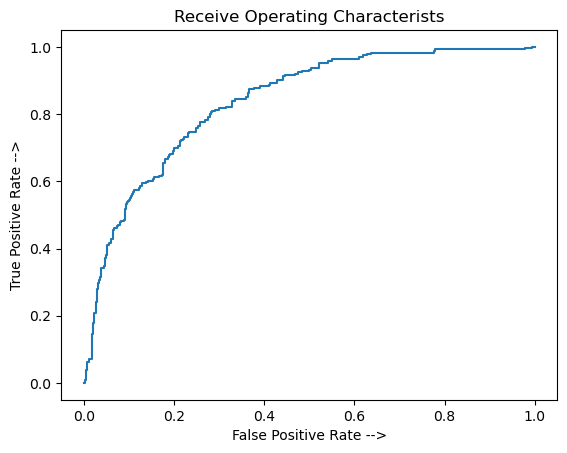

In [46]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Receive Operating Characterists")
plt.show()


In [47]:
# 1st way
auc_value=roc_auc_score(y_train,y_pred_proba[:,1])
auc_value

0.8366523084701509

In [49]:
# 2nd way
auc_value=auc(fpr,tpr)
auc_value

0.8366523084701509